<a href="https://colab.research.google.com/github/thalisrocha/Final-pw-linear-statistics/blob/main/sd_tsia204_lab2_rochapestana_thalis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Configurations


In [ ]:
# Change here using YOUR own first and last names
fn1 = "Thalis"
ln1 = "RochaPestana"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"


In [ ]:
!pip install git+https://github.com/agramfort/check_notebook

!cd ~/src/folder_with_notebooks
!check_notebook *.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/agramfort/check_notebook to /tmp/pip-req-build-ndj77dms
  Running command git clone --filter=blob:none --quiet https://github.com/agramfort/check_notebook /tmp/pip-req-build-ndj77dms
  Resolved https://github.com/agramfort/check_notebook to commit 217a225954ff830c5c2cee9b14a61cad59eed2b5
  Preparing metadata (setup.py) ... done
  Created wheel for check-notebook: filename=check_notebook-0.1-py3-none-any.whl size=15883 sha256=4fc0cfc93edceeb026d7c998dd4a15b5dadd98fad0a963287bbb98a952c16136
  Stored in directory: /tmp/pip-ephem-wheel-cache-h5hbo8oc/wheels/4c/4c/32/150b8207186f8c86f01dfb54de5e477719191bc5d03e7dd324
Successfully built check-notebook
/bin/bash: line 0: cd: /root/src/folder_with_notebooks: No such file or directory
.......
----------------------------------------------------------------------
Ran 7 tests in 0.000s

OK


In [ ]:
!jupyter nbextension install https://github.com/kenkoooo/jupyter-autopep8/archive/master.zip --user
!jupyter nbextension enable jupyter-autopep8-master/jupyter-autopep8

Downloading: https://github.com/kenkoooo/jupyter-autopep8/archive/master.zip -> /tmp/tmpv3p81exw/master.zip
Extracting: /tmp/tmpv3p81exw/master.zip -> /root/.local/share/jupyter/nbextensions
Enabling notebook extension jupyter-autopep8-master/jupyter-autopep8...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


# Importing data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import scipy as sp
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
import matplotlib.style as style
style.use('tableau-colorblind10')

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SD/SD-TSIA-204/meatspec.csv", sep = ",", engine= "python")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


# 1

## a)

Set the random seed to 0.

In [ ]:
y = df[["fat"]]
X = df.drop(y, axis=1)

## b)
Load the data. Print the mean, and standard deviation of every covariate. Is the data centered? Normalized? Standardized?


**Answer:** As it is possible to verify, the data **is not Centered** (because the means of the covariates are not equal to 0). The data **is not Normalized or Standardized** because it is not in the range from 0 to 1 and it does not have mean equal to 0 and standard deviation equal to 1.

In [ ]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.198627,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.542146,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354
min,2.066420,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,...,2.358810,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130
25%,2.512265,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,...,2.798680,2.781960,2.763715,2.741450,2.722130,2.702475,2.682635,2.664900,2.647370,2.628230
50%,2.753600,2.755180,2.756680,2.758240,2.759860,2.761610,2.763550,2.765680,2.768660,2.770720,...,3.093290,3.079400,3.058200,3.036290,3.014480,2.993020,2.971850,2.953740,2.935140,2.915640
75%,3.006155,3.010470,3.014840,3.019260,3.025895,3.032780,3.039780,3.046930,3.054310,3.061875,...,3.507110,3.493140,3.477830,3.462340,3.446320,3.429490,3.411360,3.393100,3.375965,3.358195
max,4.237280,4.247210,4.257370,4.267730,4.278470,4.289680,4.301330,4.313310,4.325870,4.339270,...,5.144620,5.128190,5.111870,5.095180,5.077600,5.058950,5.038260,5.015710,4.991070,4.965430


## c)

Separate the data in train and test sets: save one fourth of the data as testing (you can use train_test_split from sklearn.model_selection) and standardize
both the training and testing sets using the fit_transform and transform functions in sklearn.preprocessing.StandardScaler.


In [ ]:
X_traindf, X_testdf, y_traindf, y_testdf = train_test_split(X, y, random_state=0)

y_traindf_array = np.array(y_traindf).reshape(-1,1)
y_testdf_array = np.array(y_testdf).reshape(-1,1)

X_train = scaler.fit_transform(X_traindf, y_traindf)
X_test = scaler.transform(X_testdf)

y_train = scaler.fit_transform(y_traindf_array)
y_test = scaler.transform(y_testdf_array)

X_train = pd.DataFrame(X_train, index=X_traindf.index, columns = X_traindf.columns)
X_test = pd.DataFrame(X_test, index=X_testdf.index, columns = X_testdf.columns)
y_train = pd.DataFrame(y_train, index=y_traindf.index, columns = y_traindf.columns)
y_test = pd.DataFrame(y_test, index=y_testdf.index, columns = y_testdf.columns)


In [ ]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,...,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02
mean,-4.413309e-17,9.654113e-18,1.461909e-16,-4.978764e-16,-9.695488e-16,6.399298e-16,2.758318e-18,-2.978984e-16,-2.041155e-16,-4.992556e-16,...,2.872099e-16,-1.180905e-16,-2.723839e-17,3.616845e-16,3.137587e-16,6.237247e-16,-9.481718e-17,-3.203097e-16,1.565346e-16,-6.075196e-16
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,...,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00
min,-1.728379e+00,-1.725155e+00,-1.722144e+00,-1.718970e+00,-1.715868e+00,-1.712951e+00,-1.710172e+00,-1.707720e+00,-1.705466e+00,-1.703071e+00,...,-1.476519e+00,-1.474628e+00,-1.472811e+00,-1.474849e+00,-1.477329e+00,-1.479726e+00,-1.482024e+00,-1.484244e+00,-1.486276e+00,-1.488185e+00
25%,-6.951314e-01,-6.913551e-01,-6.874920e-01,-6.839169e-01,-6.826686e-01,-6.828912e-01,-6.831309e-01,-6.833389e-01,-6.834423e-01,-6.861470e-01,...,-7.668882e-01,-7.684970e-01,-7.701116e-01,-7.716562e-01,-7.730601e-01,-7.742044e-01,-7.751380e-01,-7.756372e-01,-7.757463e-01,-7.754645e-01
50%,-2.047058e-01,-2.064600e-01,-2.082710e-01,-2.100563e-01,-2.096814e-01,-2.092777e-01,-2.088319e-01,-2.082229e-01,-2.076415e-01,-2.068506e-01,...,-1.962268e-01,-1.971198e-01,-1.952131e-01,-1.898143e-01,-1.918213e-01,-1.942895e-01,-1.973396e-01,-2.009600e-01,-2.052609e-01,-2.102193e-01
75%,4.943333e-01,4.936166e-01,4.928318e-01,4.921155e-01,5.009920e-01,5.099344e-01,5.181839e-01,5.257000e-01,5.325583e-01,5.384968e-01,...,5.519996e-01,5.504754e-01,5.490854e-01,5.475408e-01,5.455876e-01,5.431792e-01,5.401710e-01,5.360391e-01,5.306937e-01,5.241516e-01
max,3.420805e+00,3.417746e+00,3.415238e+00,3.413037e+00,3.411344e+00,3.410190e+00,3.409433e+00,3.408775e+00,3.408630e+00,3.409288e+00,...,3.533737e+00,3.541486e+00,3.548788e+00,3.555476e+00,3.560998e+00,3.565404e+00,3.567641e+00,3.568526e+00,3.567899e+00,3.567193e+00


In [ ]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.127194,0.127440,0.127686,0.127895,0.128073,0.128236,0.128404,0.128567,0.128736,0.128870,...,0.134913,0.134595,0.134303,0.134061,0.133880,0.133761,0.133731,0.133782,0.133892,0.134029
std,0.885122,0.885764,0.886349,0.886903,0.887404,0.887830,0.888174,0.888448,0.888656,0.888767,...,0.887192,0.886645,0.886144,0.885717,0.885410,0.885216,0.885254,0.885472,0.885853,0.886333
min,-1.430106,-1.427834,-1.425622,-1.423593,-1.421753,-1.419963,-1.419206,-1.419104,-1.418919,-1.418871,...,-1.232805,-1.230718,-1.228436,-1.225920,-1.223326,-1.220652,-1.218016,-1.215137,-1.212103,-1.208894
25%,-0.486316,-0.487349,-0.488307,-0.489389,-0.490569,-0.491719,-0.492804,-0.493889,-0.494980,-0.496143,...,-0.597700,-0.598400,-0.599236,-0.600101,-0.600973,-0.601890,-0.602750,-0.603643,-0.604515,-0.605451
50%,0.126253,0.122348,0.118658,0.115172,0.111965,0.109027,0.106407,0.104201,0.102444,0.101259,...,0.069284,0.067675,0.066003,0.064307,0.062651,0.061080,0.059545,0.058040,0.056553,0.059302
75%,0.500512,0.505092,0.509517,0.513791,0.517918,0.521810,0.525544,0.529207,0.532779,0.536195,...,0.694773,0.706775,0.719124,0.731236,0.739278,0.736948,0.734909,0.733074,0.731528,0.730169
max,2.538793,2.533538,2.528507,2.523692,2.518997,2.514403,2.509745,2.504793,2.499629,2.494405,...,2.686683,2.660846,2.635485,2.610375,2.586515,2.563434,2.542269,2.522663,2.504255,2.487269


In [ ]:
y_train.describe()

,fat
count,1.610000e+02
mean,2.206654e-17
std,1.003120e+00
min,-1.355039e+00
25%,-8.591285e-01
50%,-3.002452e-01
75%,7.860351e-01
max,2.391841e+00


In [ ]:
y_test.describe()

,fat
count,54.000000
mean,0.008788
std,1.011488
min,-1.268451
25%,-0.746958
50%,-0.343539
75%,0.697480
max,2.439070


## d)

Fit a regular OLS, do we need to fit the intercept?

**Answer:** When working with standardized data, it is common practice do not include an intercept term in the model because the standardization process transforms the data such that the mean of each feature is centered at 0 and the variance is equal to 1. In such cases, adding an intercept term to the model would be redundant and could potentially add unnecessary complexity.

Nevertheless, it is crucial to assess the objectives and needs of the analysis before making a decision on whether to include an intercept term in a model using standardized data, as it can have an effect on the interpretation of the results.

In [ ]:
lin_reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

y_true = np.copy(y_test)

R2score = r2_score(y_test, y_pred)

teta_coef = lin_reg.coef_

## e)

Create a dataFrame df_coef and store the R2 coefficients of the estimated model. This data frame will be used along the TP to store and compare R2 coefficients of other variants of the
OLS problem.

**Answer:**

In [ ]:
df_coef = pd.DataFrame([R2score], index=['R2 score'], columns = ['Preprocessed Data'])

df_coef

,Preprocessed Data
R2 score,0.960055


# 2

Program the method of the forward variable selection. You can use the test statistics of the test for nullity (as seen during the course). Do not define the stop criterion for the method, i.e. add a variables at each time until all the variables are used. Store the order of the variable selection and the associated p-value for each of them.

**Answer:**

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
def forward_var_selection(input_matrix, output_vector):
    residual = np.copy(output_vector)
    selected_covariates = []
    p_values = []
    num_rows, num_cols = input_matrix.shape
    e = np.array([0, 1])

    for k in range(num_cols):
        theta_values = []
        t_values = []
        for i in range(num_cols):
            if i not in selected_covariates:
                ols = LinearRegression()
                reg = ols.fit(input_matrix[:, i].reshape(-1, 1), residual)
                theta = np.array([reg.intercept_, reg.coef_[0]])
                theta_values.append(theta)

                x_ = np.stack((np.ones(num_rows), input_matrix[:, i]), axis=1)
                gram_matrix = (1/num_rows) * (x_.T @ x_)
                noise_estimator = (1/(num_rows-2)) * np.linalg.norm(residual - x_ @ theta)**2

                s_square = e.T @ np.linalg.inv(gram_matrix) @ e
                t_value = np.sqrt(num_rows) * np.linalg.norm(theta, ord=1) * (1/(np.sqrt(s_square)*noise_estimator))
                t_values.append(float(t_value))
            else:
                theta_values.append(np.array([0, 0]))
                t_values.append(0)

        cov_index = t_values.index(max(t_values))
        selected_covariates.append(cov_index)
        p_value = 2 * (1 - norm.cdf(max(t_values)))
        p_values.append(p_value)
        selected_x_ = np.c_[np.ones(num_rows), input_matrix[:, cov_index]]
        residual -=  selected_x_ @ theta_values[cov_index]

    return p_values, selected_covariates

In [ ]:
p_values, var_order = forward_var_selection(X_train, y_train)

In [ ]:
np.array(var_order)

array([40,  7, 39,  6, 41,  8, 38,  5, 42,  9, 37,  4, 36, 10, 97,  3, 43,
       11, 35,  2, 96, 12, 98, 13, 34,  1, 44,  0, 95, 14, 33, 15, 99, 16,
       32, 17, 94, 18, 93, 19, 45, 64, 31, 65, 92, 63, 91, 66, 90, 67, 30,
       20, 89, 62, 88, 68, 46, 61, 87, 69, 86, 60, 85, 53, 29, 52, 84, 70,
       83, 54, 28, 59, 82, 21, 47, 55, 81, 58, 27, 51, 80, 71, 26, 56, 79,
       57, 48, 72, 78, 50, 25, 22, 77, 73, 24, 74, 76, 75, 49, 23])

In [ ]:
np.array(p_values)

array([0.        , 0.01761061, 0.01745048, 0.01655033, 0.01718331,
       0.01647531, 0.01728771, 0.01662537, 0.02043894, 0.01990468,
       0.01981103, 0.01945562, 0.02638865, 0.02575844, 0.02943824,
       0.03354623, 0.03075535, 0.03019065, 0.03425452, 0.035407  ,
       0.03943112, 0.04310109, 0.04749495, 0.0558538 , 0.05125932,
       0.05093972, 0.06342498, 0.06740935, 0.07145314, 0.07827881,
       0.07499589, 0.08256114, 0.09534919, 0.11533294, 0.12678632,
       0.14339328, 0.14791955, 0.17980362, 0.2044645 , 0.24607647,
       0.25154797, 0.25587808, 0.26661148, 0.27416952, 0.2829636 ,
       0.28698854, 0.31606503, 0.31930717, 0.34889136, 0.35330633,
       0.37480157, 0.36932335, 0.37705499, 0.38517725, 0.41027838,
       0.4133985 , 0.42678954, 0.43268579, 0.43795969, 0.4433497 ,
       0.46312737, 0.46721373, 0.49153337, 0.49433628, 0.49288102,
       0.49817193, 0.5261826 , 0.53093653, 0.56817472, 0.57031535,
       0.59932653, 0.60645714, 0.61727683, 0.61887969, 0.62084

# 3
Run OLS on the variables with a p-value smaller than 0.05.


## a)

Apply the OLS of the sklearn library.

**Answer:**

In [ ]:
var_selected = [v for v, p in zip(var_order, p_values) if p<0.05]
y_train_sel = np.zeros((len(var_selected),1))

X_train_sel = X_train[:, var_selected]
X_test_sel = X_test[:, var_selected]

ols = LinearRegression(fit_intercept=False).fit(X_train_sel, y_train)
y_pred = ols.predict(X_test_sel)

In [ ]:
len(var_selected)

23

## b)

Store the R2 coefficient in df_coef.

**Answer:**

In [ ]:
y_true = np.copy(y_test)
R2score = r2_score(y_true, y_pred)

df_coef['p-value<0.05'] = R2score

In [ ]:
df_coef

,Preprocessed Data,p-value<0.05
R2 score,0.960055,0.95518


# 4
Using SequentialFeatureSelector on a linear regression estimator select (with forward selection), select the same number of variables as in the previous question.

## a)

Elaborate on why the 2 algorithms do not return the same variables and store the R2 onto the corresponding dataFrame.

**Answer:**
In my algorithm, the selection of variables is based on the p-value, which serves as a threshold. The p-value measures the strength of evidence against the null hypothesis, which assumes no statistical significance between a predictor variable and the response. A common threshold for accepting or rejecting the null hypothesis is a p-value of less than 0.05. It's worth mentioning that this threshold is not universal and may not be suitable for all data and research objectives.

The SequentialFeatureSelector uses a greedy search algorithm to identify the most informative features, which is different from the approach used by my algorithm. Because the performance metric used in the SequentialFeatureSelector is also different, the selected features may not be the same as those identified by my algorithm. To obtain consistent results, it's important to use the same performance metric and hypothesis testing procedure as the SequentialFeatureSelector.


In [ ]:
ols = LinearRegression(fit_intercept=False)
sfs = SequentialFeatureSelector(ols, n_features_to_select= len(var_selected),
                                direction='forward')
sfs.fit(X_train, y_train)

var_sfs = sfs.get_support(indices=True)

ols_sfs = LinearRegression(fit_intercept=False).fit(X_train[:,var_sfs], y_train)
y_pred = ols_sfs.predict(X_test[:, var_sfs])

R2score = r2_score(y_true, y_pred)
df_coef['SFS'] = R2score

In [ ]:
print("Variables obtained with SFS:", var_sfs, "\n",
      "Variables obtained with FVS", var_selected)

Variables obtained with SFS: [ 0  1  3 18 19 21 34 35 39 40 43 46 47 48 49 57 72 74 82 87 90 97 99] 
 Variables obtained with FVS [40, 7, 39, 6, 41, 8, 38, 5, 42, 9, 37, 4, 36, 10, 97, 3, 43, 11, 35, 2, 96, 12, 98]


In [ ]:
df_coef

,Preprocessed Data,p-value<0.05,SFS
R2 score,0.960055,0.95518,0.93873


# 5
Code your own ridge estimator using expression derived in class. Test it for a penalty parameter α spaced evenly on a log scale 10e-9 to 10e2.

In [ ]:
def ridge_estimate(X, Y, alpha):
  n = X.shape[0]
  Ip = np.identity(X.shape[1])
  teta_ridge = np.linalg.inv(X.T @ X + (1/n)*alpha*Ip) @ X.T @ Y

  return teta_ridge

## a)

Plot how the values of the coefficients change with α.

**Answer:**

In [ ]:
alpha = np.logspace(-9, -2, 100)
coef = []
y_pred_ridge = []
for a in alpha:
  est_rdg = ridge_estimate(X_train, y_train, a)
  coef.append(est_rdg)
  #comparison
  ridge = Ridge(a, fit_intercept = False, solver="svd").fit(X_train, y_train)
  y_pred_ridge.append(ridge.predict(X_test))

y_pred_ridge = np.array(y_pred_ridge)

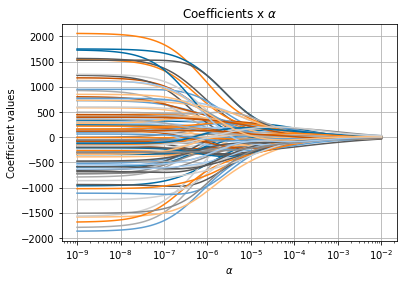

In [ ]:
for i in range(100):
  aux = []
  for vec in coef:
    aux.append(vec[i])

  aux = np.array(aux)
  plt.plot(alpha,aux)
  plt.xscale('log')

plt.grid()
plt.title(r"Coefficients x $\alpha$")
plt.ylabel("Coefficient values")
plt.xlabel(r"$\alpha$")
plt.show()

## b)

Plot how MSE of both the train and test sets change with α. Signal the minimum with a point.

**Answer:**

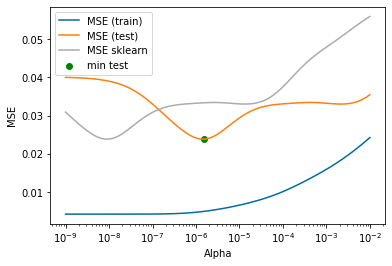

In [ ]:
mse_train = []
mse_test = []
mse_test_comparison = []
for ind, vec in enumerate(coef):
  y_pred_train = X_train @ vec
  y_pred_test = X_test @ vec
  mse_train.append(mean_squared_error(y_train, y_pred_train))
  mse_test.append(mean_squared_error(y_test, y_pred_test))
  mse_test_comparison.append(mean_squared_error(y_test, y_pred_ridge[ind]))

mse_train = np.array(mse_train)
mse_test = np.array(mse_test)
mse_test_comparison = np.array(mse_test_comparison)
plt.plot(alpha, mse_train, label='MSE (train)')
plt.plot(alpha, mse_test, label='MSE (test)')
plt.plot(alpha, mse_test_comparison, label='MSE sklearn')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
argmin = np.argmin(mse_test)
best_alpha = alpha[argmin]
plt.scatter(best_alpha, mse_test[argmin], marker="o", s=35, color='green', label="min test")
plt.legend()
plt.show()

## c)

For the best performing value of α (the one with smallest training error) store the R2 results.

**Answer:**

In [ ]:
rdg_alpha = ridge_estimate(X_train, y_train, best_alpha)
y_pred = X_test @ rdg_alpha

R2score = r2_score(y_true, y_pred)
df_coef['Ridge'] = R2score

In [ ]:
df_coef

,Preprocessed Data,p-value<0.05,SFS,Ridge
R2 score,0.960055,0.95518,0.93873,0.976267


# 6
Use the sklearn version of the Lasso. Test it for a penalty parameter α space evenly on a log scale 10e-5 to 10e-2.

In [ ]:
alpha = np.logspace(-5, -2, 100)

## a)

To avoid having warnings and error you want to decrease the parameter tol or increase max_iter. Elaborate on why these warning arise and on the solution

**Answer:**

The Lasso algorithm in sklearn raises a warning when the parameters tol and max_iter are adjusted in a way that could affect its convergence. The tol parameter is responsible for setting the tolerance for the optimization, while max_iter sets the maximum number of iterations the algorithm can perform.

Increasing tol can lead to a reduction in the optimization's precision, and reducing max_iter can limit the number of steps the algorithm takes to find the optimal solution. As a result, the algorithm may terminate before reaching the optimal solution, leading to suboptimal results.

To prevent convergence issues, it is essential to strike a balance between tol and max_iter values. By selecting appropriate values for these parameters, it is possible to ensure that the Lasso algorithm converges to the optimal solution.

## b)
Plot the number of coefficients that are different from 0 for each value of α.

**Answer:**

In [ ]:
N_nonzero = []
mse_lasso_test = []
mse_lasso_train = []
coef_lasso = []
for a in alpha:
  lasso = Lasso(alpha=a, tol=1e-1, max_iter=20000)
  lasso.fit(X_train, y_train)
  y_pred_lasso_test = lasso.predict(X_test)
  y_pred_lasso_train = lasso.predict(X_train)
  mse_lasso_test.append(mean_squared_error(y_test, y_pred_lasso_test))
  mse_lasso_train.append(mean_squared_error(y_train, y_pred_lasso_train))
  coef_lasso.append(lasso.coef_)
  nonzero_coef = np.count_nonzero(lasso.coef_)
  N_nonzero.append(nonzero_coef)

mse_lasso_test = np.array(mse_lasso_test)
mse_lasso_train = np.array(mse_lasso_train)

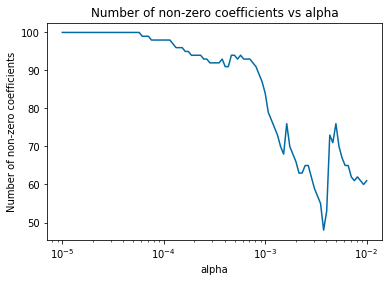

In [ ]:
plt.plot(alpha, N_nonzero)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Number of non-zero coefficients')
plt.title('Number of non-zero coefficients vs alpha');

## c)
Plot how MSE of both the train and test sets change with α. Signal the minimum with a point.

**Answer:**

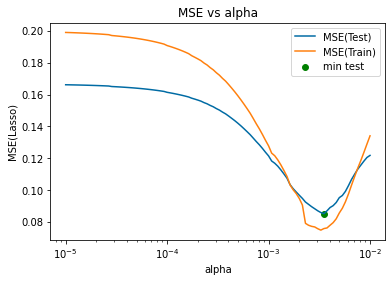

In [ ]:
plt.plot(alpha, mse_lasso_test, label='MSE(Test)')
plt.plot(alpha, mse_lasso_train, label='MSE(Train)')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE(Lasso)')
argmin = np.argmin(mse_lasso_test)
best_alpha = alpha[argmin]
plt.scatter(best_alpha, mse_lasso_test[argmin], marker="o", s=35, color='green', label="min test")
plt.legend()
plt.title('MSE vs alpha');

## d)
For the best performing value of α on the test set store the R2 results

**Answer:**

In [ ]:
lasso = Lasso(alpha=best_alpha, tol=1e-1, max_iter=20000)
lasso.fit(X_train, y_train)
y_pred_lasso_alpha = lasso.predict(X_test)

R2score = r2_score(y_true, y_pred_lasso_alpha)
df_coef['Lasso'] = R2score
df_coef

,Preprocessed Data,p-value<0.05,SFS,Ridge,Lasso
R2 score,0.960055,0.95518,0.93873,0.976267,0.915196


# 7
Code your own version of the crossvalidation. Preferable, in the same way as sklearn’s version, the
length of every pair of folds should differ at most by one. Use the sklearn version of the Elastic
net. Validate with a cross-validation that you implement. Test it for a penalty parameter α-ridge
spaced evenly on a log scale 10e-10 to 10e3 and α-lasso in [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99].

**Answer:**

In [ ]:
def cross_validation(X, y, alpha_lasso, alpha_ridge, k=5):

  n = X.shape[0]
  # fold_size = n // k
  # fold_size = KFold(n_splits = k)
  fold_size = TimeSeriesSplit(n_splits=k)
  indices = np.random.permutation(n)
  r2scores = []
  coefs_model = []
  mean_mse = []
  alphas = []
  mean_lasso = []
  alphas_lasso = []
  store_argming = []
  gammas_final = []

  best_gamma = []
  best_coefg = []

  count1 = 0
  count2 = 0
  count3 = 0
  fsizesplit = fold_size.split(X)

  for a in alpha_lasso:
    gammas = []
    mean_gamma = []
    for l in alpha_ridge:

      alpha = a + l
      l1_ratio = a/(a+l)
      mse_kfold = []
      coefs_gamma=[]
      for train_index, test_index in fold_size.split(X):

        X_train, X_test = X[train_index,:], X[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                           tol=5e-1, max_iter=1000)
        model.fit(X_train, y_train)
        coefs_model.append(model.coef_)
        coefs_gamma.append(model.coef_)
        y_pred = model.predict(X_test)
        mse_kfold.append(mean_squared_error(y_test, y_pred))
      argmin = np.argmin(np.array(mse_kfold))
      best_coefg.append(np.array(coefs_gamma)[argmin,:])

      gammas.append(a+l)
      gammas_final.append(a+l)

      mean_mse.append(np.mean(mse_kfold))
      mean_gamma.append(np.mean(mse_kfold))
      alphas.append([l, a])

    argmin_gamma = np.argmin(np.array(mean_gamma))
    store_argming.append(argmin_gamma)
    best_gamma.append(gammas[argmin_gamma])
    mean_lasso.append(np.mean(mean_mse))
    alphas_lasso.append(a)
  argmin = np.argmin(np.array(mean_mse))
  best_param = alphas[argmin]

  return best_param, best_gamma, store_argming, best_coefg, gammas_final


In [ ]:
alpha_ridge = np.logspace(-10, 3,100)
alpha_lasso = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]

In [ ]:
best_param, best_g, argming, coefg, gammas = cross_validation(X_train, y_train, alpha_lasso, alpha_ridge)

In [ ]:
alpha = best_param[1] + best_param[0]
l1_ratio = best_param[1]/(best_param[1]+best_param[0])

model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                           tol=5e-1, max_iter=1000)
model.fit(X_train, y_train)

y_pred_elastic = model.predict(X_test)

R2score = r2_score(y_true, y_pred_elastic)
df_coef['ElasticNet'] = R2score
df_coef

,Preprocessed Data,p-value<0.05,SFS,Ridge,Lasso,ElasticNet
R2 score,0.960055,0.95518,0.93873,0.976267,0.915196,0.11788


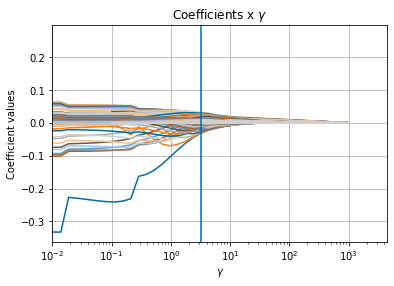

In [ ]:
gammas = np.array(gammas)
coefg = np.array(coefg)

aux = []
for vec in coefg:
  aux.append(vec)

aux = np.array(aux)
plt.plot(gammas, aux)
plt.xscale('log')
plt.grid()
plt.title(r"Coefficients x $\gamma$")
plt.ylabel("Coefficient values")
plt.xlabel(r"$\gamma$")
plt.axvline(x=best_param[0])
plt.xlim(left=10e-3)
plt.show()

# 8
For this question, we are going to use only variable 40 of the dataset original (non-centered) X. Plot
the dataset and the regression line fitted with the whole sample. Generate 50 bootstrap samples,
for each of the samples fit a regression model and plot the 50 estimated regression lines in the same
plot (by setting alpha=.4 in the plotting function you can make the lines more transparent for the
sake of readability of the plot). Finally, in the same plot, plot the prediction intervals (see exercise
12 in the lecture notes for the expression of the confidence intervals for the one dimensional case).

**Answer:**


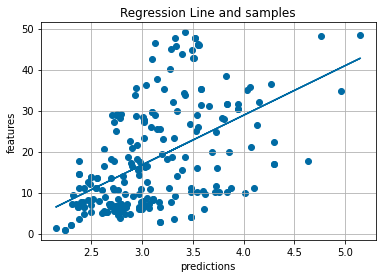

In [ ]:
X_40 = X[['V40']]

OLS_40 = LinearRegression(fit_intercept = True)
OLS_40.fit(X_40, y)
y_pred_ols = OLS_40.predict(X_40)
y_pred_ols

plt.scatter(X_40, y)
plt.plot(X_40.values, y_pred_ols)
plt.title("Regression Line and samples")
plt.ylabel("features")
plt.xlabel("predictions")
plt.grid()
plt.show()

In [ ]:
def PI(alpha, deg):
  I = [1-alpha/2. , alpha/2.]
  PI = t.ppf(I, deg)
  return PI

alpha = 0.95

Xb_pi = np.array(X_40).reshape(-1,1)
ybs = np.array(y)
n,p = Xb_pi.reshape(-1,1).shape
lr = LinearRegression(fit_intercept=True)

alpha = 0.05

y_pred = lr.fit(Xb_pi, ybs).predict(Xb_pi)
sigma_hat = np.sqrt(np.sum((ybs-y_pred)**2)/(n-2))
gama = (Xb_pi-(Xb_pi.mean())**2)/(np.sum((Xb_pi-(Xb_pi.mean()))**2))
T = PI(alpha, n-2)
PI = y_pred + T*sigma_hat*np.sqrt((1+(1/n)+gama))

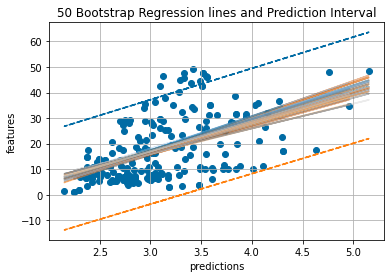

In [ ]:
y_pred_list = []
n_bootstrap = 50
for i in range(n_bootstrap):
    bootstrap_sample = df.sample(n=len(df), replace=True)
    yb = bootstrap_sample['fat']
    Xb = bootstrap_sample[['V40']]
    ols_model = LinearRegression(fit_intercept =True)
    ols_model.fit(Xb, yb)
    y_pred_ols = ols_model.predict(Xb)
    plt.plot(Xb.values, y_pred_ols, alpha=.4)
    y_pred_list.append(y_pred_ols)

plt.scatter(X_40, y)
plt.plot(X_40.values, PI, '--')
plt.title("50 Bootstrap Regression lines and Prediction Interval")
plt.ylabel("features")
plt.xlabel("predictions")
plt.grid()
plt.show()

# 9

Compute the covariance matrix. Compute the singular value decomposition of the covariancematrix. For consistency in the notation use $ U,s,V = SVD(X^T X)$.

**Answer:**


In [ ]:
U, s, V = np.linalg.svd(X_train.T @ X_train)

## a)
Plot a heatmap of the covariance matrix.

**Answer:**

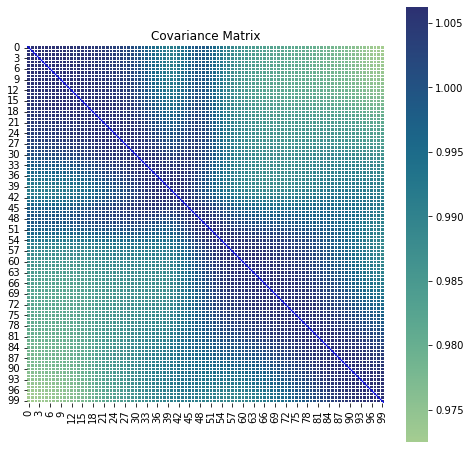

In [ ]:
cov_mat = np.cov(X_train.T)

plt.figure(figsize=(8, 8))
sns.heatmap(cov_mat, cmap="crest", linewidths = .05, square=True, cbar=True)

plt.plot([0, cov_mat.shape[0]], [0, cov_mat.shape[0]], 'b-', lw=1)

plt.title('Covariance Matrix')
plt.show()

## b)
In PCA we transform the data to a new coordinate system such that the greatest variance by some scalar projection of the data lies on the first coordinate (called the first principal component, PC1), the second greatest variance in the second PC and so on. The PCs are computed given the above SVD, as XU. Instead of using the whole transformation, XU.


## c)
Plot the amount of variance explained by the first k components for k ∈ 2..p.

**Answer:**

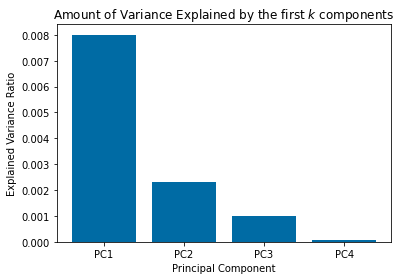

In [ ]:
k = 5

pca = PCA()
pca.fit(X_train)

variance_ratio = pca.explained_variance_ratio_[1:k]
cum_sum_eigenvalues = np.cumsum(variance_ratio)

legend_list = []
for i in range(1, k):
  legend_list.append("PC"+str(i))

# plot the variance ratios as a bar chart
plt.bar(range(1,k), variance_ratio)
plt.title("Amount of Variance Explained by the first $k$ components")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1,k), legend_list)
plt.show()

In [ ]:
print("Variance explained by PC0:", pca.explained_variance_ratio_[0]*100, "%")
print("Variance explained by PC1:", pca.explained_variance_ratio_[1]*100, "%")

Variance explained by PC0: 98.62619258180267 %
Variance explained by PC1: 0.9697052286049943 %


## d)
We will use (as an approximation) the first 2 PCs. Plot the projected data using as color the value of y and interpret the plot.

**Answer:**

Principal Component Analysis (PCA) is a powerful technique for reducing the dimensionality of high-dimensional data by reorganizing resources based on their linear combinations. It is commonly used as a feature extraction method in machine learning and data analysis.

One of the key characteristics of PCA is that the first principal component contains the majority of the information about the dataset, which represents the most important directions of variation in the data. The second principal component is more informative than the third, and so on.

By analyzing the variance explained by each principal component, we can determine the most significant components for our analysis. For example, if the first two principal components explain a large percentage of the variance in the data, we may be able to reduce the dimensionality of the dataset by only considering these two components for our analysis.

In some cases, removing the first few principal components may result in a significant loss of information. However, if we can retain a high percentage of the original variance in the data using only a small number of principal components, we can simplify the dataset while preserving the important information.

It is important to note that PCA is just a tool for dimensionality reduction, and it may not always lead to better classification performance. In some cases, a more complex model such as a neural network may be necessary to achieve accurate classification.

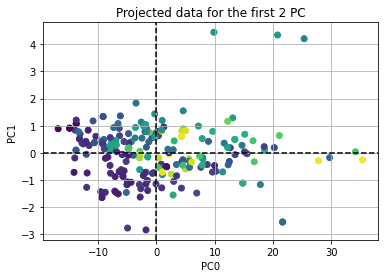

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data_scaled)

plot =plt.scatter(data_transformed[:,0], data_transformed[:,1], c=np.array(y))
# plt.legend(handles=plot.legend_elements()[0],
#            labels=list(y['fat']))
plt.title("Projected data for the first 2 PCs")
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid()
plt.show()

## e)
Run OLS on the projected data using k components for k evenly spaced in 2..p. Store the best score in the dataFrame.


**Answer:**

# 10
Summarize the results of the models and elaborate in their main characteristics.

In [ ]:
df_coef

,Preprocessed Data,p-value<0.05,SFS,Ridge,Lasso,ElasticNet
R2 score,0.960055,0.95518,0.93873,0.976267,0.915196,0.11788


The R2 scores above indicate that feature selection using the p-value criterion did not improve the model. The p-value measures evidence against the null hypothesis, which assumes that the relationship between a predictor variable and the response is not statistically significant. While a p-value less than 0.05 is often used as a threshold for accepting or rejecting the null hypothesis, it's important to note that this threshold is arbitrary and may not be appropriate for all datasets and research questions.

The Ridge Regression model outperformed the OLS model, as evident from the higher R2 score. Ridge regression is particularly useful when the dataset suffers from multicollinearity, which occurs when there are high correlations among the predictor variables. The addition of a penalty term in Ridge regression reduces the impact of multicollinearity on the regression coefficients, leading to better prediction accuracy and generalization performance, especially when the number of predictors is large relative to the number of observations.

However, the Lasso model performed worse compared to Ordinary Least Squares and Ridge. This could be due to the characteristics of the dataset. Lasso tends to perform better when there are only a few important predictors and many features in the dataset are irrelevant or redundant, leading to feature selection by driving some of the coefficients to exactly zero. Ridge, on the other hand, is more effective when there are many predictors with small to medium-sized effects that are correlated with each other. In cases where there are many predictors with small to medium-sized effects that are very correlated, Lasso may overly penalize some important predictors, resulting in poor performance. The PCA scores show that the variables in this model are highly correlated, making Ridge regression a better option.

In contrast, Elastic Net performed poorly, and there could be multiple reasons for this, such as inadequate dataset size, imbalanced class distribution, and so on. It's important to be aware of the assumptions and limitations of each model and choose the appropriate one for the specific dataset and research question.